Transfer learning model on 

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, SeparableConv2D
from keras.layers import Input, GlobalAveragePooling2D
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [13]:
dirname = os.path.abspath('')
data_dir = pathlib.Path(os.path.join(dirname, 'DBN'))
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

832


In [14]:
batch_size = 32
img_size = (224,224,3)
img_height = 224
img_width = 224

In [15]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=1488,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 832 files belonging to 7 classes.
Using 666 files for training.
Found 832 files belonging to 7 classes.
Using 166 files for validation.


Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
MobilenetV3large (Functional (None, 7, 7, 1280)        4226432   
_________________________________________________________________
conv2d_99 (Conv2D)           (None, 6, 6, 1280)        6554880   
_________________________________________________________________
global_average_pooling2d_5 ( (None, 1280)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 8967      
Total params: 10,790,279
Trainable params: 6,563,847
Non-trainable params: 4,226,432
_________________________________________________________________


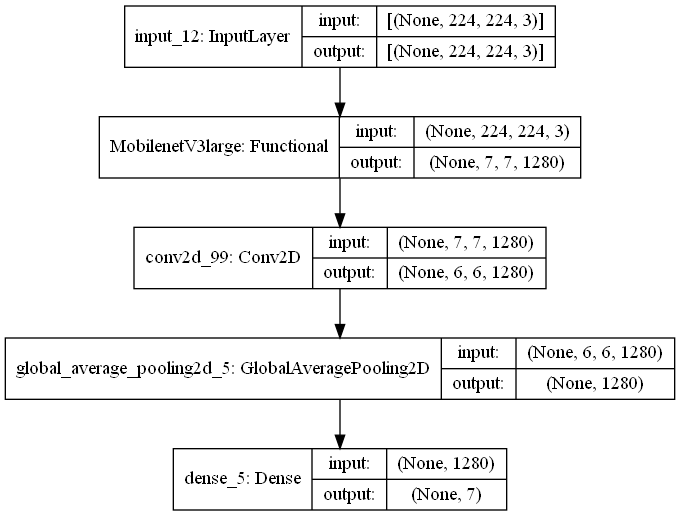

In [20]:
class_names = train_ds.class_names
num_classes = 7

base_model = tf.keras.applications.MobileNetV3Large(input_shape=img_size, weights="imagenet", include_top=False)
base_model.trainable = False


preprocess_input = tf.keras.applications.mobilenet_v3.preprocess_input

inputs = tf.keras.Input(shape=(224, 224, 3))
x = preprocess_input(inputs)
x = base_model(x, training=False)
x = Conv2D(1280, 2, activation='relu')(x)
x = GlobalAveragePooling2D()(x)
outputs = Dense(num_classes, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)

    
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()

plot_model(model, show_shapes=True, show_layer_names=True)

In [21]:
epochs = 10
history = model.fit(train_ds,epochs=epochs,validation_data=val_ds)

Epoch 1/10
21/21 [==============================] - 5s 87ms/step - loss: 0.9988 - accuracy: 0.6652 - val_loss: 0.0561 - val_accuracy: 1.0000
Epoch 2/10
21/21 [==============================] - 1s 45ms/step - loss: 0.0669 - accuracy: 0.9943 - val_loss: 0.0288 - val_accuracy: 1.0000
Epoch 3/10
21/21 [==============================] - 1s 45ms/step - loss: 0.0277 - accuracy: 1.0000 - val_loss: 0.0194 - val_accuracy: 0.9940
Epoch 4/10
21/21 [==============================] - 1s 45ms/step - loss: 0.0147 - accuracy: 1.0000 - val_loss: 0.0119 - val_accuracy: 1.0000
Epoch 5/10
21/21 [==============================] - 1s 45ms/step - loss: 0.0106 - accuracy: 1.0000 - val_loss: 0.0089 - val_accuracy: 1.0000
Epoch 6/10
21/21 [==============================] - 1s 45ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 0.0065 - val_accuracy: 1.0000
Epoch 7/10
21/21 [==============================] - 1s 45ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 8/10
21

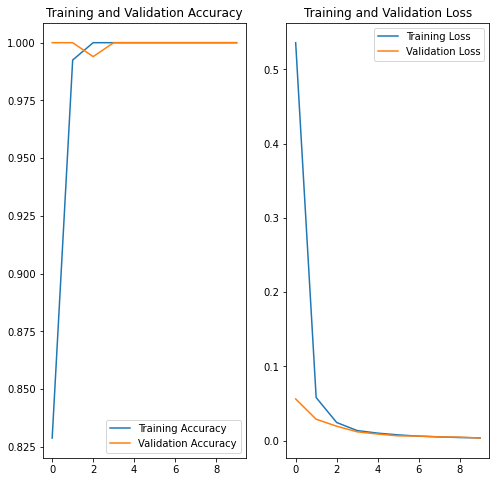

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()